# チョコレートとノーベル賞

### 元の論文

[Messerli, F. H. (2012). Chocolate consumption, cognitive function, and Nobel laureates. N Engl J Med, 367(16), 1562-1564. ](https://cbb.sjtu.edu.cn/~jingli/courses/2018fall/bi372/files/NEJM.pdf)

> Chocolate consumption enhances cognitive function, which is a sine qua non for winning the Nobel Prize
>
> （チョコレートの消費はノーベル賞受賞に必要不可欠である認知能力を高める）

という強めの主張をしている。

追試してみる。

### データ

同様のデータを[統計的因果推論の理論と実装 - 共立出版](https://www.kyoritsu-pub.co.jp/book/b10011781.html)が`data06.csv`として配布している。

論文をもとに同様の収集方法をとったらしいが、年度的にはもっと新しいデータになっているらしい

In [14]:
# y1: 人口1000万人あたりのノーベル賞受賞者数
# x1: 人口1人あたりの年間チョコレート消費量（kg）
# x2: 一人あたりGDP
data06 = """
country,y1,x1,x2
australia,3.871325502,4.9,54.763
austria,15.65853828,8.1,49.701
belgium,8.643572769,5.6,46.198
brazil,0,1.2,8.755
canada,4.17386626,4,46.55
china,0.021249789,0.1,10.004
denmark,22.24752355,4.9,60.657
finland,7.260276558,5.4,48.678
france,9.046821006,4.3,40.319
germany,9.98135639,7.9,46.232
greece,1.865921418,2.5,19.604
ireland,12.05448628,7.9,81.637
italy,2.535105679,4,33.09
japan,1.980565613,1.2,40.063
netherlands,9.650766575,5.1,53.053
norway,20.37488303,5.8,74.986
poland,1.833324603,5.7,15.727
portugal,1.94207716,2,23.35
spain,1.265977079,4,29.816
sweden,30.76310773,6.6,52.896
switzerland,28.79889044,8.8,85.135
unitedkingdom,18.7831965,7.6,41.855
unitedstates,11.44517395,4.4,65.134
""".strip()

In [15]:
import pandas as pd
from io import StringIO

data = StringIO(data06)
df = pd.read_csv(data)
df.head()

,country,y1,x1,x2
0,australia,3.871326,4.9,54.763
1,austria,15.658538,8.1,49.701
2,belgium,8.643573,5.6,46.198
3,brazil,0.000000,1.2,8.755
4,canada,4.173866,4.0,46.550


<AxesSubplot:xlabel='x2', ylabel='y1'>

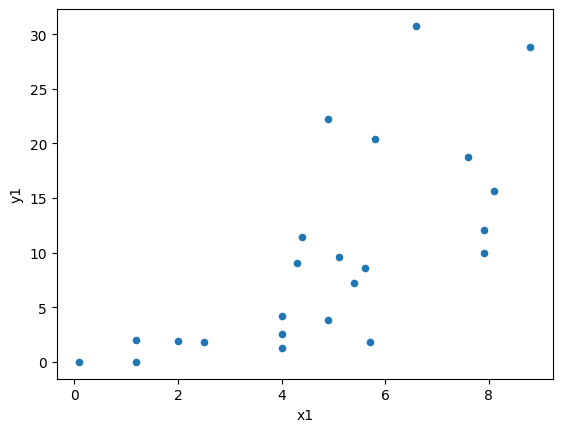

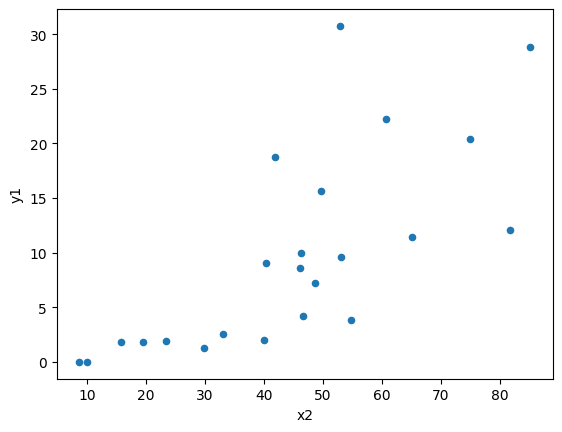

In [17]:
df.plot.scatter(x="x1", y="y1")
df.plot.scatter(x="x2", y="y1")

In [18]:
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer


Stargazer([
    smf.ols("y1 ~ x1", data=df).fit(),
    smf.ols("y1 ~ x2", data=df).fit(),
    smf.ols("y1 ~ x1 + x2", data=df).fit(),
])